<a href="https://colab.research.google.com/github/zacksfF/Automated_ML-in-real-world-app/blob/main/MLP_CNN_using_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import tensorflow
import tensorflow as tf
tf.random.set_seed(42)

##Load data

In [6]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


##Explore daata

In [7]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
len(train_labels), len(test_labels)

(60000, 10000)

In [9]:
train_labels, test_labels

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

## let's Visualize the daataa

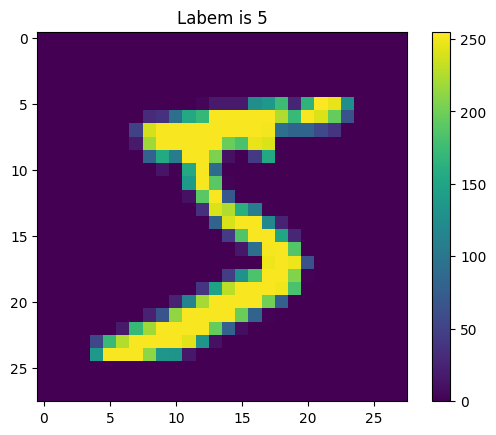

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[0]) #, cmap='gray
plt.colorbar()
plt.title("Labem is {label}".format(label=train_labels[0]))
plt.show()

## data Preprocessing: scaling

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [17]:
%matplotlib inline

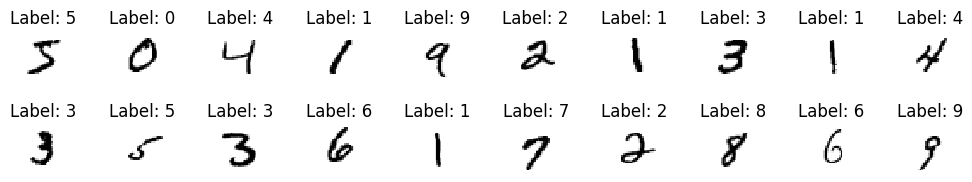

In [18]:
# plot first 20 images
n = 20
_, axes = plt.subplots(2, 10, figsize=(10,2))
plt.tight_layout()
for i in range(n):
  row, col = i // 10, i % 10
  axes[row, col].set_axis_off()
  axes[row, col].imshow(
      train_images[
          i,
      ],
      cmap=plt.cm.binary,
      interpolation = "nearest"
  ) # plt.cm.gray_r
  axes[row, col].set_title("Label: %i"% train_labels[i])

## Build MLP

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

mlp_model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = train_images.shape[1:]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
mlp_model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [20]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
mlp_model.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=1)

Epoch 1/5
938/938 [==============================] - 4s 3ms/step - loss: 2.3014 - accuracy: 0.1119
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 2.3011 - accuracy: 0.1124
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 2.3008 - accuracy: 0.1124
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 2.3002 - accuracy: 0.1124
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 2.2988 - accuracy: 0.1124


In [23]:
test_loss, test_acc= mlp_model.evaluate(test_images, test_labels, verbose= 0)
test_acc

0.11349999904632568

## Build a Conventional neurl networks

In [25]:
# CNN
def build_cnn():
  model = keras.Sequential(
      [
          keras.layers.Conv2D(
              32, (3 , 3), activation="relu", input_shape = train_images.shape[1:] + (1,)
          ),
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(64, (3, 3), activation = "relu"),
          keras.layers.Flatten(),
          keras.layers.Dense(64, activation="relu"),
          keras.layers.Dense(10, activation="softmax")
      ]
  )
  model.compile(
      optimizer="adam",
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics = ["accuracy"]
  )
  return model

In [26]:
cnn_model = build_cnn()

In [27]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                495680    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                      

In [28]:
train_images_4d = train_images[..., tf.newaxis]
test_images_4d = test_images[..., tf.newaxis]
train_images_4d.shape, test_images_4d.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [30]:
cnn_model.fit(train_images_4d, train_labels, epochs=5, batch_size=64, verbose=1 )

Epoch 1/5
938/938 [==============================] - 54s 57ms/step - loss: 2.3015 - accuracy: 0.1110
Epoch 2/5
938/938 [==============================] - 53s 57ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/5
938/938 [==============================] - 53s 57ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 4/5
938/938 [==============================] - 52s 56ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 5/5
938/938 [==============================] - 55s 59ms/step - loss: 2.3013 - accuracy: 0.1124


In [31]:
test_loss, test_acc = cnn_model.evaluate(test_images_4d, test_labels, verbose=0)
test_acc

0.11349999904632568

## Make Prediction

In [32]:
test_predictions = cnn_model.predict(test_images_4d)
test_predictions[:5]

313/313 [==============================] - 3s 10ms/step


array([[0.09757596, 0.11176006, 0.10053533, 0.10127089, 0.09735024,
        0.09068286, 0.0983051 , 0.10535482, 0.09698896, 0.10017569],
       [0.09757596, 0.11176006, 0.10053533, 0.10127089, 0.09735024,
        0.09068286, 0.0983051 , 0.10535482, 0.09698896, 0.10017569],
       [0.09757596, 0.11176006, 0.10053533, 0.10127089, 0.09735024,
        0.09068286, 0.0983051 , 0.10535482, 0.09698896, 0.10017569],
       [0.09757596, 0.11176006, 0.10053533, 0.10127089, 0.09735024,
        0.09068286, 0.0983051 , 0.10535482, 0.09698896, 0.10017569],
       [0.09757596, 0.11176006, 0.10053533, 0.10127089, 0.09735024,
        0.09068286, 0.0983051 , 0.10535482, 0.09698896, 0.10017569]],
      dtype=float32)

In [33]:
import numpy as np
np.argmax(test_predictions[0])

1

In [34]:
test_labels[0]

7